## PIC 16A Final Project

In [1]:
import os 
os.getcwd()
from Created_Class import classifier

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib
from matplotlib import pyplot as plt
from sklearn import tree, preprocessing
import numpy as np
import sklearn
from sklearn.model_selection import cross_val_score, train_test_split
import os
import importlib
penguins = pd.read_csv("palmer_penguins (3).csv")

In [3]:
penguins = penguins[["Culmen Length (mm)", "Flipper Length (mm)", "Body Mass (g)", "Sex", "Island", "Species"]]

In [4]:
penguins = penguins.dropna()
penguins = penguins[penguins["Sex"] != "."]

In [5]:
def EDA(data, split_by):
    if split_by in data._get_numeric_data().columns:
        raise TypeError("split_by must be a categorical varaible from the dataset!")
    print("\n Quantitative Varaible Analysis")
    sns.pairplot(data, hue=split_by)  
    plt.show()
    print(data.describe())
    categorical_data = data[set(list(data.columns)) - set(list(data._get_numeric_data().columns))]
    categorical_data= categorical_data.drop(split_by, axis = 1)
    sns.heatmap(data.corr(), cmap="YlGnBu")
    plt.show()
    print("\n Categorical Varaible Analysis")
    for i in range(categorical_data.shape[1]):
        sns.countplot(x=categorical_data.iloc[:,i], hue = data[split_by])
        plt.show()


 Quantitative Varaible Analysis


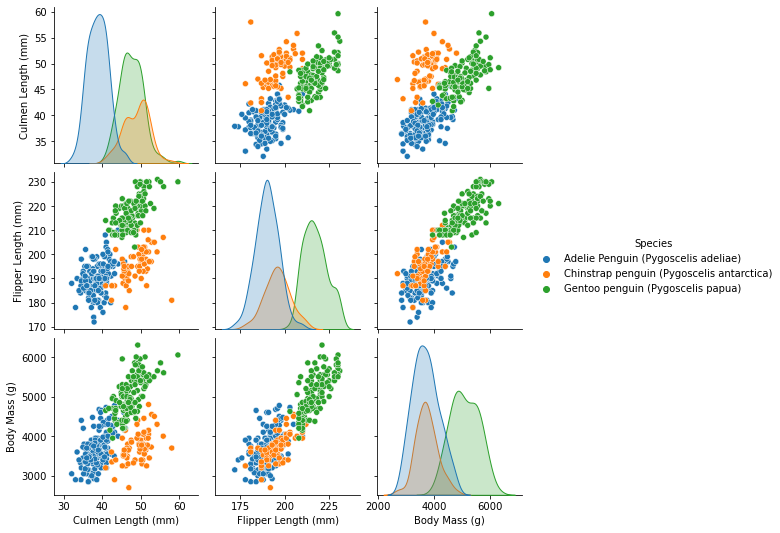

       Culmen Length (mm)  Flipper Length (mm)  Body Mass (g)
count          333.000000           333.000000     333.000000
mean            43.992793           200.966967    4207.057057
std              5.468668            14.015765     805.215802
min             32.100000           172.000000    2700.000000
25%             39.500000           190.000000    3550.000000
50%             44.500000           197.000000    4050.000000
75%             48.600000           213.000000    4775.000000
max             59.600000           231.000000    6300.000000


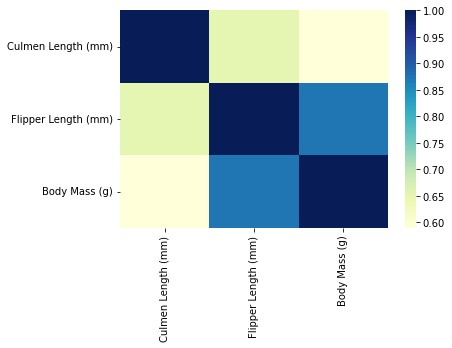


 Categorical Varaible Analysis


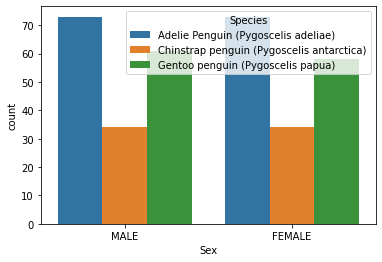

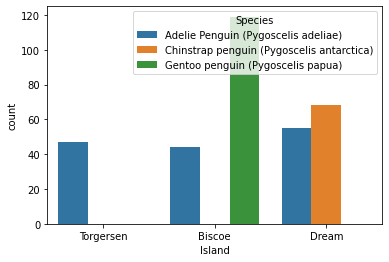

In [6]:
EDA(penguins, "Species")

In [7]:
from sklearn.preprocessing import LabelEncoder
spec_enc = LabelEncoder()
sex_enc = LabelEncoder()
penguins["Species"]=spec_enc.fit_transform(penguins["Species"])
penguins['Sex'] = sex_enc.fit_transform(penguins['Sex'])
penguins['Island'] = sex_enc.fit_transform(penguins['Island'])

In [44]:
def my_train_test_split_(data, split_threshold = .8):
    np.random.seed(1)
    random_data_shuffle = data.sample(data.shape[0])
    train = random_data_shuffle.iloc[0:int(data.shape[0]*split_threshold),:]
    test = random_data_shuffle.iloc[int(data.shape[0]*split_threshold):,:]
    return train, test

In [45]:
train, test = my_train_test_split_(penguins)

# An Example of the Decision Tree model

In [84]:
DT = classifier("Decision Tree", train, test, ["Culmen Length (mm)", "Island"], "Species")

In [85]:
DT.training_accuracy()

0.9849624060150376

In [86]:
DT.cross_validate()

0.9322152341020266

Hyperparameter that maximizes cross valdiation  3  with accuracy score of   0.9473794549266248


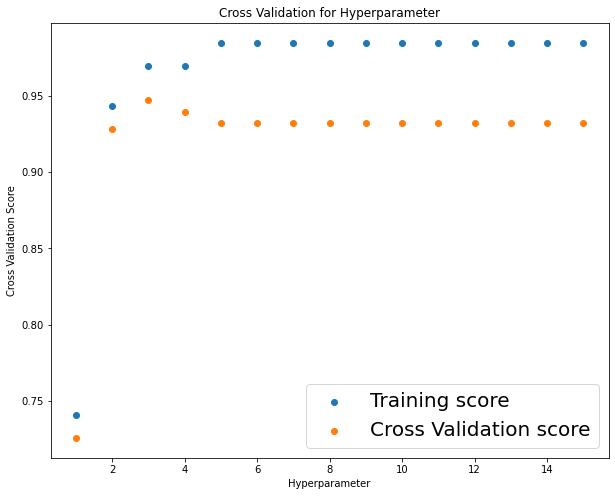

In [87]:
DT.cross_validate_for_hyperparameter(1,15)

## Refitting with the best hyperparameter

In [88]:
DT = classifier("Decision Tree", train, test, ["Culmen Length (mm)", "Island"], "Species", hyperparameter_decision_tree  = 3)

In [89]:
DT.training_accuracy()

0.9699248120300752

In [90]:
DT.cross_validate()

0.9473794549266248

0.9701492537313433


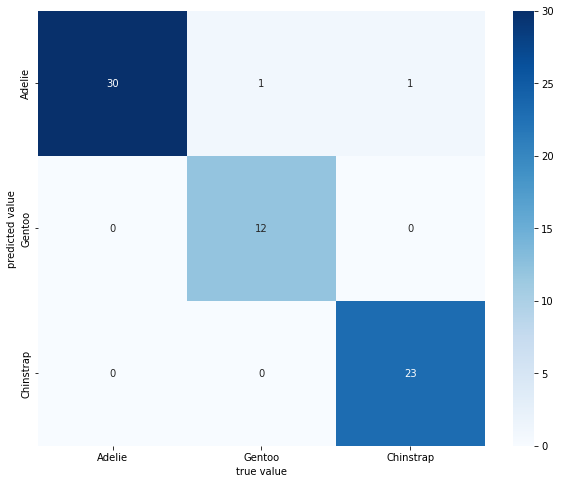

In [91]:
DT.testing_accuracy()

# An example of the KNN model

In [92]:
knn = classifier("Knn", train, test, ["Flipper Length (mm)", "Body Mass (g)"], "Species")

In [93]:
knn.training_accuracy()

0.849624060150376

In [94]:
knn.cross_validate()

0.7593291404612159

Hyperparameter that maximizes cross valdiation  13  with accuracy score of   0.8084556254367575


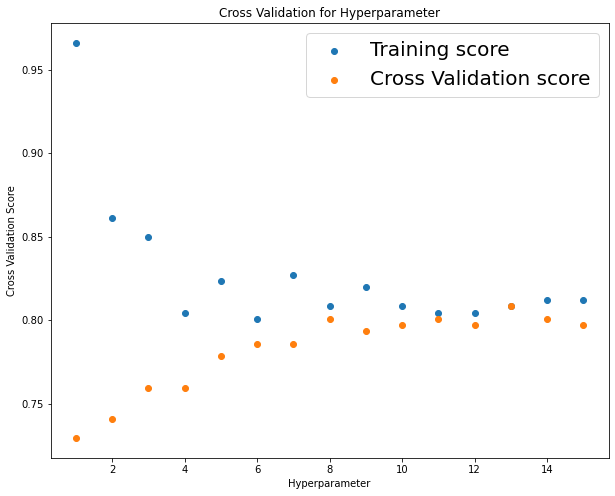

In [95]:
knn.cross_validate_for_hyperparameter(1,15)

## Refitting with the best hyperparameter

In [96]:
knn = classifier("Knn", train, test, ["Flipper Length (mm)", "Body Mass (g)"], "Species", hyperparameter_knn = 13)

In [97]:
knn.training_accuracy()

0.8082706766917294

In [98]:
knn.cross_validate()

0.8084556254367575

0.835820895522388


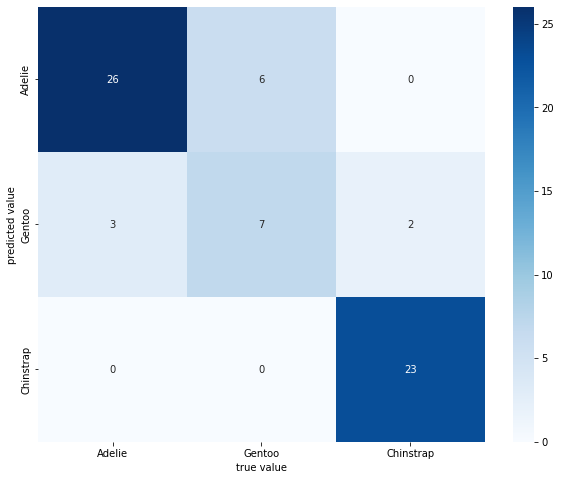

In [99]:
knn.testing_accuracy()